In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import Birch

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [2]:
file = "repetitors_1.xlsx"
datafile = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)
datafile

,Column1,author,date,discipline,id,mark,reply,text,tutorlink,tutorname
0,0.0,Юлия,2019-07-03,биология,3913905.0,лучше не бывает!,NaN,Очень грамотный и приятный преподаватель ) оче...,https://repetitors.info/repetitor/?p=SuhorukovaNA,Сухорукова Наталия Альбертовна
1,1.0,Ксения,2019-07-03,не указана,3913841.0,лучше не бывает!,NaN,"Прислушивается к потребностям, очень хорошо об...",https://repetitors.info/repetitor/?p=RebrovRU,Ребров Родион Юрьевич
2,2.0,Виктория,2019-07-03,физика,3913830.0,лучше не бывает!,NaN,Сын писал пробный ЕГЭ на 70 баллов. Стал заним...,https://repetitors.info/repetitor/?p=SadovnikovSV,Садовников Сергей Викторович
3,3.0,Жанна,2019-07-03,английский язык,3913781.0,лучше не бывает!,NaN,"Лидия замечательный преподаватель, пунктуальны...",https://repetitors.info/repetitor/?p=ErshovaLV5,Ершова Лидия Владимировна
4,4.0,Елена,2019-07-03,русский язык,3913776.0,лучше не бывает!,NaN,"Плюсы: Репетитор замечательный, легко нашла ко...",https://repetitors.info/repetitor/?p=NoskovaEI,Носкова Евгения Игоревна
...,...,...,...,...,...,...,...,...,...,...
288720,3047.0,Марина Погадаева,2007-03-19,химия,502.0,почти отлично,NaN,"По химии стала понимать, о чем говорит учитель...",https://repetitors.info/repetitor/?p=KomnatnyVV,Комнатный Виталий Викторович
288721,3048.0,Надежда Борисовна,2007-03-18,математика,475.0,почти отлично,NaN,"Тактичный, ответственный,пунктуальный, професс...",https://repetitors.info/repetitor/?p=RubanSA,Рубан Сергей Алексеевич
288722,3049.0,Ирина,2006-12-13,математика,203.0,почти отлично,NaN,"Интеллигентный,образованный человек.Объясняет ...",https://repetitors.info/repetitor/?p=ZaitsevSV,Зайцев Сергей Владимирович
288723,3050.0,Хомякова Юлия Станиславовна,2006-12-13,математика,201.0,почти отлично,NaN,"Довольны работой Георгия, очень быстро нашел о...",https://repetitors.info/repetitor/?p=MutafianGS,Мутафян Георгий Семёнович


In [3]:
datafile = datafile.drop(['Column1', 'author', 'date', 'id', 'reply', 'text', 'tutorlink', 'tutorname'], axis=1).dropna()
datafile

,discipline,mark
0,биология,лучше не бывает!
1,не указана,лучше не бывает!
2,физика,лучше не бывает!
3,английский язык,лучше не бывает!
4,русский язык,лучше не бывает!
...,...,...
288720,химия,почти отлично
288721,математика,почти отлично
288722,математика,почти отлично
288723,математика,почти отлично


In [4]:
marks = {}
number = 1
for mark in datafile['mark'].unique():
    marks[mark] = number
    number += 1
marks

{'лучше не бывает!': 1,
 'отлично': 2,
 'вполне хорошо': 3,
 'ужасно': 4,
 'плохо': 5,
 'так себе...': 6,
 'более-менее': 7,
 'почти хорошо': 8,
 'хорошо': 9,
 'почти отлично': 10}

In [5]:
datafile = datafile.replace({"mark": marks}).dropna()
datafile

,discipline,mark
0,биология,1
1,не указана,1
2,физика,1
3,английский язык,1
4,русский язык,1
...,...,...
288720,химия,10
288721,математика,10
288722,математика,10
288723,математика,10


In [6]:
disciplines = {}
number = 1
for subject in datafile['discipline'].unique():
    disciplines[subject] = number
    number += 1
disciplines

{'биология': 1,
 'не указана': 2,
 'физика': 3,
 'английский язык': 4,
 'русский язык': 5,
 'математика': 6,
 'химия': 7,
 'обществознание': 8,
 'рисование': 9,
 'испанский язык': 10,
 'логопеды': 11,
 'литература': 12,
 'информатика': 13,
 'эконометрика': 14,
 'подготовка к школе': 15,
 'начальная школа': 16,
 'география': 17,
 'вокал': 18,
 'фортепиано': 19,
 'история': 20,
 'французский язык': 21,
 'арабский язык': 22,
 'микроэкономика': 23,
 'итальянский язык': 24,
 'психология': 25,
 'сопротивление материалов': 26,
 'шахматы': 27,
 'статистика': 28,
 'немецкий язык': 29,
 'музыка': 30,
 'высшая математика': 31,
 'бухгалтерский учет': 32,
 'китайский язык': 33,
 'греческий язык': 34,
 'японский язык': 35,
 'скрипка': 36,
 'РКИ': 37,
 'актерское мастерство': 38,
 'экономика': 39,
 'гитара': 40,
 'программирование': 41,
 'черчение': 42,
 'менеджмент': 43,
 'риторика': 44,
 'макроэкономика': 45,
 'польский язык': 46,
 'корейский язык': 47,
 'флейта': 48,
 'турецкий язык': 49,
 'матема

In [7]:
datafile = datafile.replace({"discipline": disciplines})
datafile

,discipline,mark
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
288720,7,10
288721,6,10
288722,6,10
288723,6,10


# Birch

In [8]:
brc = Birch(branching_factor=50, n_clusters=None, threshold=1.5)
brc.fit(datafile.values)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=None,
      threshold=1.5)

In [9]:
labels = brc.predict(datafile.values)
len(labels)

288723

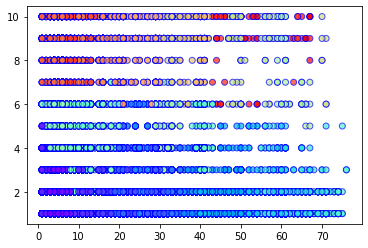

In [10]:
plt.scatter(datafile.values[:,0], datafile.values[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')

# K-Means

In [11]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ]
)

In [27]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(labels)
true_labels[:5]

array([2, 2, 0, 0, 0])

In [28]:
label_encoder.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [29]:
n_clusters = len(label_encoder.classes_)
n_clusters

49

In [30]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [31]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [32]:
pipe.fit(datafile)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1))),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=2, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=49, n_init=50, n_jobs=None,
                                         precom

In [50]:
predicted_labels = pipe["clusterer"]["kmeans"].labels_

In [51]:
adjusted_rand_score(true_labels, predicted_labels)

0.6201031367535151

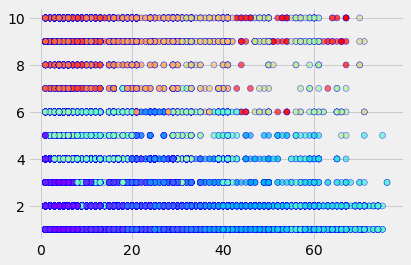

In [49]:
plt.scatter(datafile.values[:,0], datafile.values[:,1], c=true_labels, cmap='rainbow', alpha=0.7, edgecolors='b')